<a href="https://colab.research.google.com/github/AdityaGogoi/Fast-AI-Deep-Learning/blob/master/Lesson4_Classification_and_Regression_on_Tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular models

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.tabular import *
from fastai.vision import *

Tabular data should be in a Pandas `DataFrame`.

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k


In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,False,0.7632,-0.0661,-0.0312,>=50k
Private,Bachelors,Never-married,Sales,Unmarried,White,False,-0.0430,-1.4747,1.1422,<50k
Private,Assoc-acdm,Married-civ-spouse,Machine-op-inspct,Husband,White,False,-0.1896,-0.8191,0.7511,<50k
Private,1st-4th,Married-civ-spouse,Transport-moving,Husband,White,False,1.0564,-0.2592,-3.1604,<50k
Federal-gov,HS-grad,Widowed,Adm-clerical,Unmarried,White,False,1.1297,0.3856,-0.4224,<50k
Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,False,-0.1896,-1.1605,-0.4224,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.7760,-0.6630,-0.4224,<50k
Private,Doctorate,Never-married,Exec-managerial,Not-in-family,White,False,0.9831,-0.7466,2.3157,>=50k
Local-gov,Masters,Married-civ-spouse,Adm-clerical,Husband,White,False,0.7632,0.2482,1.5334,>=50k
Private,HS-grad,Never-married,Sales,Own-child,White,False,-1.1425,-0.0562,-0.4224,<50k


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [0]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.357582,0.369471,0.865000,00:06


## Inference

In [0]:
row = df.iloc[1]

In [0]:
row

age                             44
workclass                  Private
fnlwgt                      236746
education                  Masters
education-num                   14
marital-status            Divorced
occupation         Exec-managerial
relationship         Not-in-family
race                         White
sex                           Male
capital-gain                 10520
capital-loss                     0
hours-per-week                  45
native-country       United-States
salary                       >=50k
Name: 1, dtype: object

In [0]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.3323, 0.6677]))

Trying to use the same principles on a different dataset.

## Forest Cover Classification
We will use the **Tabular Data Learner** to **classify Forest Cover** type from the [Kaggle Forest Cover Type Competition](https://www.kaggle.com/c/forest-cover-type-prediction/data)
[UCI ML Dataset](https://archive.ics.uci.edu/ml/datasets/Covertype).

This dataset originally came from the **University of California - Irvine** - ML Repository:

```Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science```

The different **Forest Covers** with their **Label Numbers** in this dataset are:

1.  Spruce/Fir
2.  Lodgepole Pine
3.  Ponderosa Pine
4.  Cottonwood/Willow
5.  Aspen
6.  Douglas-fir
7.  Krummholz

In this project we will use the different **geographical conditions** in a particular area to **determine** the **type of Forest** that is present in that area. Then we will **compare** it with the **most dominant Forest Type** present in respective area.

We will also **submit** the output on the **Test dataset** to Kaggle and see how our Model has fared against the competition.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
forest_path = Path(base_dir + 'data/forestCoverType/')

In [0]:
forest_raw_train = pd.read_csv(forest_path/'train.csv')

In [0]:
forest_raw_train.head(3)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
forest_raw_test = pd.read_csv(forest_path/'test.csv')

We will now check out the **different fields** present in the dataset and classify them among **Continuous** and **Categorical** data types.

We will also assign the **Dependent** field i.e. the **field** which contains the Forest Type we are trying to **Predict**.

In [0]:
forest_raw_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [0]:
dep_var = 'Cover_Type'
cat_names = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
cont_names = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
procs = [FillMissing, Categorify, Normalize]

We will next create the **Train** and **Test** dataset and include it in the **Tabular Data Bunch**.

In [0]:
forest_test = TabularList.from_df(forest_raw_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
forest_train = (TabularList.from_df(forest_raw_train, path=forest_path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                           .label_from_df(cols=dep_var)
                           .add_test(forest_test)
                           .databunch())

In [0]:
forest_train.show_batch(rows=5)

Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,target
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.2598,-1.1819,-0.5307,-0.4420,-0.4915,2
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.2334,-0.0661,-0.2939,-0.8803,-0.7860,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4068,-0.3564,-1.2412,-0.3658,-0.8351,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6826,-1.0096,-1.7149,2.1595,-0.0824,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.6514,-0.9370,-1.1228,0.1488,-1.0315,1


Now we will create a **Tabular Learner** and train it on the **Train dataset**.

First we will do a **lr_find** to get the **optimum Learning Rate** for the training and then run **10 epochs** of **training cycles**.

In [0]:
forest_learn = tabular_learner(forest_train, layers=[200,100], metrics=accuracy)

In [0]:
forest_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


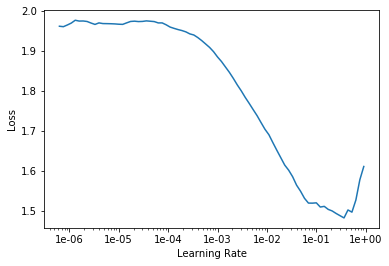

In [0]:
forest_learn.recorder.plot()

In [0]:
#forest_learn.fit(10, 1e-2)
forest_learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.566069,0.557877,0.775132,00:05
1,0.564251,0.549687,0.783730,00:05
2,0.550008,0.556350,0.778439,00:05
3,0.559087,0.544584,0.783730,00:05
4,0.542625,0.548449,0.773148,00:05
5,0.541234,0.536467,0.783730,00:05
6,0.547539,0.530028,0.787698,00:05
7,0.536895,0.531792,0.779762,00:05
8,0.526065,0.524057,0.785714,00:05
9,0.520012,0.514902,0.800926,00:05


In [0]:
row = forest_raw_train.iloc[20]

In [0]:
row.loc['Cover_Type']

5

In [0]:
# forest_learn.predict(row)[0].obj
forest_learn.predict(row)

(Category 5,
 tensor(4),
 tensor([2.4761e-04, 9.8614e-03, 1.6081e-04, 8.6541e-06, 9.8969e-01, 3.2816e-05,
         1.6320e-06]))

After **training** the Learner, we will get its **predictions** on the **Test dataset**, which we had already included in the Data Bunch.

The **labels** are numerical and **start with 0**, so for **every prediction** made by the model, we will **add a 1** to make it in the **same range** as the expected output.

In [0]:
predictions, *_ = forest_learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [0]:
labels[0:5]

tensor([1, 4, 4, 4, 4])

In [0]:
labels = labels + 1
labels[0:5]

tensor([2, 5, 5, 5, 5])

We will now get the **Predictions** along with the **ID** in a **CSV file**, which is the **expected format** of the **Kaggle competition**.

In [0]:
forest_submission = pd.DataFrame({'Id': test_id, 'Cover_Type': labels})
forest_submission.to_csv(path_or_buf=forest_path/'submission.csv', index=False)
forest_submission.head()

,Id,Cover_Type
0,15121,2
1,15122,5
2,15123,5
3,15124,5
4,15125,5


In [0]:
forest_submission['Cover_Type'].unique()

array([2, 5, 1, 7, 4, 3, 6])

After **submitting** my result at the **Kaggle Competition**, we are given a **parameter-based score** and a **rank** based on that score.

The **Scoring Parameter** for this particular Competition was **Categorization Accuracy**.

I got an **Accuracy** of approximately **63%** and a **Rank** of **1379**. But as I had **trained** and worked on this problem for just a short amount of time, this was expected.

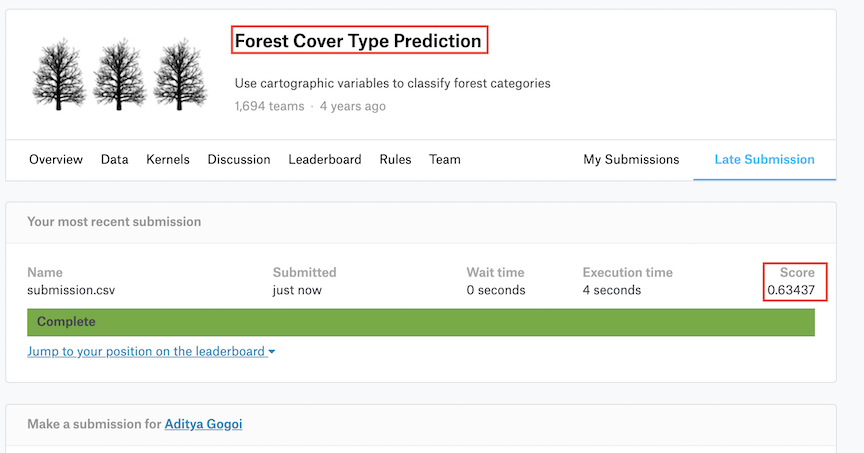

In [0]:
my_submission = open_image(forest_path/'Submission Aditya Gogoi.png')
my_submission

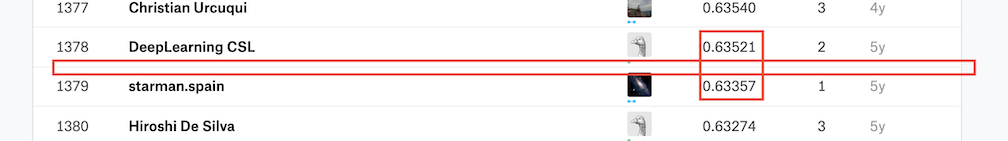

In [0]:
my_rank = open_image(forest_path/'Rank Aditya Gogoi.png')
my_rank

## Determining Housing Prices in San Francisco

The next use-case would be to use the **Tabular Learner** to predict **continuous values**.

For this we would take part in the 
[Kaggle House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) competition.

The **objective** here is to **predict** the **selling price** of a **house** in **San Francisco** based on its **various features**.

In [0]:
housing_path = Path(base_dir + 'data/housingPrices/')

In [0]:
housing_raw_train = pd.read_csv(housing_path/'train.csv')

In [0]:
housing_raw_test = pd.read_csv(housing_path/'test.csv')
housing_raw_test[['GarageCars']] = housing_raw_test[['GarageCars']].fillna(value=0)

In [0]:
housing_raw_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Like before, we will first get **all the fields** in the dataset and then **categorize** them as **Categorical**, **Continuous** and **Dependent**. 

In [0]:
housing_raw_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
dep_var = 'SalePrice'
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
             'LandContour', 'LotConfig', 'LandSlope','Condition1', 'Condition2', 
             'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'BsmtQual', 
             'BsmtCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Fence']
cont_names = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 
              'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 
             'PoolArea']
procs = [FillMissing, Categorify, Normalize]

we will then intake the **Train** and **Test** dataset and build them into a **Tabular Data bunch**.

A **notable difference** here as compared to the Forest Cover example would be **how** the **Label is defined**, Here we will **identify** the **Dependent field** as the **Label** and also **configure** it as a **FloatList class**, which means that the **values** in the field are **Continuous** and **not Categorical**.

In [0]:
housing_test = TabularList.from_df(housing_raw_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
housing_train = (TabularList.from_df(housing_raw_train, path=housing_path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                           .label_from_df(cols=dep_var, label_cls = FloatList, log = True)
                           .add_test(housing_test)
                           .databunch())

In [0]:
housing_train.show_batch(rows=5)

MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,Fence,LotFrontage_na,LotFrontage,LotArea,YearBuilt,YearRemodAdd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,target
50,RL,Pave,#na#,IR1,Lvl,FR2,Gtl,Norm,Norm,1Fam,1.5Fin,5,6,TA,TA,Ex,Y,TA,#na#,False,-0.7083,-0.2818,-1.6417,-1.6824,-1.0358,1.2246,0.1509,-0.2158,0.5955,-1.0368,-0.0724,11.950535
70,RM,Pave,#na#,Reg,Lvl,Corner,Gtl,Norm,Norm,1Fam,2Story,5,4,TA,TA,TA,N,TA,#na#,False,-0.4368,-0.3855,-2.5937,-0.9576,0.7765,-0.7620,1.3828,4.2149,-0.9571,-1.0368,-0.0724,11.585246
60,RL,Pave,#na#,Reg,Lvl,Inside,Gtl,Norm,Norm,1Fam,2Story,9,5,Ex,TA,Ex,Y,Ex,#na#,False,0.1968,-0.1712,1.0830,0.9751,0.7765,1.2246,1.3828,-0.2158,0.5955,1.6582,-0.0724,12.765689
20,RL,Pave,#na#,IR1,Lvl,Inside,Gtl,Norm,Norm,1Fam,1Story,5,8,TA,TA,Ex,Y,Gd,MnPrv,True,-0.0294,-0.2276,-0.0988,0.7818,-1.0358,-0.7620,0.1509,-0.2158,0.5955,-1.0368,-0.0724,11.944708
20,RL,Pave,#na#,Reg,Lvl,Corner,Gtl,Feedr,Norm,1Fam,1Story,5,5,TA,TA,Fa,Y,TA,MnPrv,False,0.2421,-0.2992,-0.2629,-1.0543,-1.0358,1.2246,0.1509,-0.2158,-0.9571,-1.0368,-0.0724,11.798104


We then create the Learner on top of the Train data.

Another **difference** from the Forest Cover example is the **metric** used to **evaluate** the **quality of training**. Based on the **Label type**, we have **changed the metric** to **Root Mean Square Error** (RMSE).

In [0]:
housing_learn = tabular_learner(housing_train, layers=[200,100], metrics=rmse)

In [0]:
housing_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


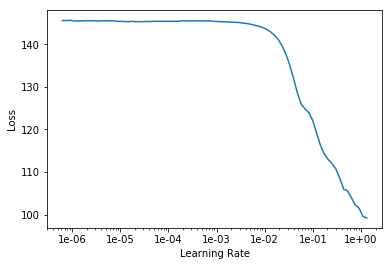

In [0]:
housing_learn.recorder.plot()

In [0]:
housing_learn.fit_one_cycle(15)
# housing_learn.fit_one_cycle(10, max_lr =1e-1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.021759,0.023374,0.151593,00:00
1,0.021868,0.023761,0.152691,00:00
2,0.020964,0.024529,0.155440,00:00
3,0.021199,0.024087,0.153888,00:00
4,0.022353,0.026859,0.163021,00:00
5,0.022250,0.025841,0.159290,00:00
6,0.022828,0.029885,0.171090,00:00
7,0.022336,0.024168,0.153705,00:00
8,0.021816,0.023471,0.152594,00:00
9,0.020827,0.024902,0.156371,00:00


In [0]:
preds, targets = housing_learn.get_preds(DatasetType.Test)
labels = [np.exp(p[0].data.item()) for p in preds]

After the training, we will get **predictions** on the **Test dataset** into a **CSV file** in the expected format.

We will **submit** this CSV fiel to **Kaggle** for **evaluation**.

In [0]:
test_id = housing_raw_test['Id']
housing_submission = pd.DataFrame({'Id': test_id, 'SalePrice': labels})
housing_submission.to_csv(path_or_buf=housing_path/'submission.csv', index=False)
housing_submission.head()

,Id,SalePrice
0,1461,124749.160917
1,1462,135134.889483
2,1463,177868.952754
3,1464,186780.890035
4,1465,212737.167827


The **Scoring Parameter** of the competition is **Root Mean Square Logarithmic Error**.

As we can see, our **Test dataset metrics** come very close to the **Train dataset metrics**.

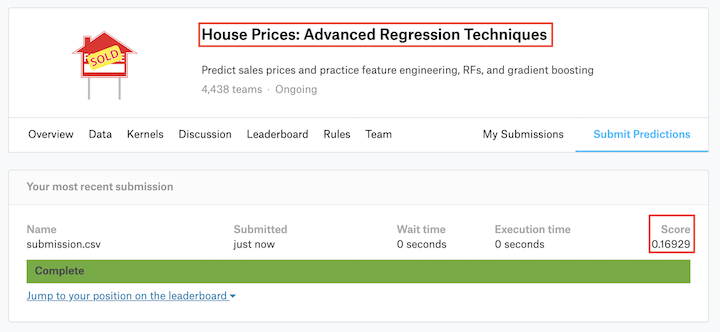

In [0]:
my_submission = open_image(housing_path/'Submission Aditya Gogoi.png')
my_submission

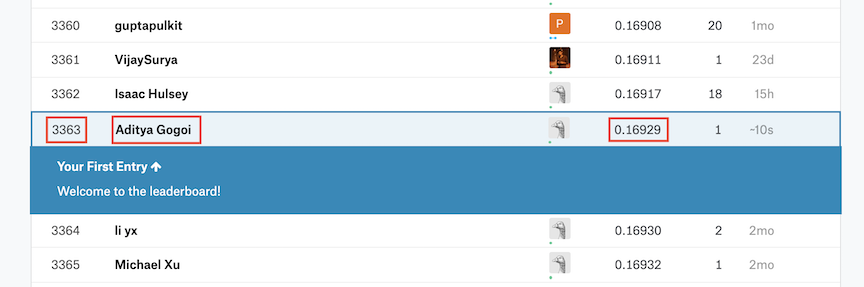

In [0]:
my_rank = open_image(housing_path/'Rank Aditya Gogoi.png')
my_rank